In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# plt.style.use(['ggplot', 'dark_background'])
%matplotlib inline

In [2]:
df = pd.read_csv('../cleanedData/master_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
df.head()

,Title,Budget,Domestic_Gross_Rev,Global_Gross_Rev,Year,Global_Gross_Profit,Global_Gross_ROI,Title & Year,ID,Runtime,Genres,AvgRating,VoteCount,Actors,Writers,Directors,Producers
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09,5.532577,Avatar - 2009,tt0499549,162,"Action,Adventure,Fantasy",7.9,1359426.0,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",NaN,James Cameron,Jon Landau
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08,1.546673,Pirates of the Caribbean: On Stranger Tides - ...,tt1298650,137,"Action,Adventure,Fantasy",6.6,548477.0,"Johnny Depp, Penélope Cruz, Ian McShane, Geoff...","Tim Powers, Ted Elliott, Terry Rossio, Stuart ...",Rob Marshall,NaN
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,-2.002376e+08,-0.572108,Dark Phoenix - 2019,tt6565702,113,"Action,Adventure,Sci-Fi",5.7,197712.0,"James McAvoy, Michael Fassbender, Jennifer Law...",NaN,Simon Kinberg,"Todd Hallowell, Hutch Parker, Lauren Shuler Do..."
3,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,1.072414e+09,3.243841,Avengers: Age of Ultron - 2015,tt2395427,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0,"Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chr...","Stan Lee,Jack Kirby,Joe Simon,Jim Starlin",Joss Whedon,Kevin Feige
4,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,1.748134e+09,5.827114,Avengers: Infinity War - 2018,tt4154756,149,"Action,Adventure,Sci-Fi",8.4,1151795.0,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...","Jack Kirby, Christopher Markus, Stephen McFeel...","Anthony Russo,Joe Russo",NaN


<AxesSubplot:xlabel='AvgRating', ylabel='Global_Gross_Profit'>

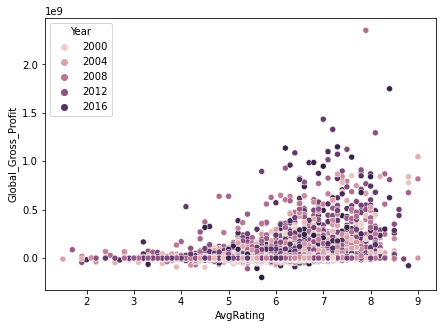

In [4]:
fig, ax = plt.subplots(figsize=(7,5))

sns.scatterplot(x=df.AvgRating, y= df.Global_Gross_Profit, hue = df.Year)

In [5]:
df['Genres'] = df['Genres'].fillna("")
df['Genres'] = df['Genres'].apply(lambda x : x.split(','))

df['Actors'] = df['Actors'].fillna("")
df['Actors'] = df['Actors'].apply(lambda x : x.split(','))

df['TotalVotesRating'] = df['AvgRating'] * df['VoteCount']

In [6]:
df['Genres'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Comedy, Drama, Romance]          151
[Comedy]                          131
[Adventure, Animation, Comedy]    127
[Drama]                           120
[Comedy, Romance]                 118
                                 ... 
[]                                  1
[Comedy, Crime, Sport]              1
[Action, Sci-Fi, Sport]             1
[Drama, Fantasy, History]           1
[Documentary, Drama, History]       1
Name: Genres, Length: 308, dtype: int64

In [7]:
genres=df.explode('Genres')
genres

,Title,Budget,Domestic_Gross_Rev,Global_Gross_Rev,Year,Global_Gross_Profit,Global_Gross_ROI,Title & Year,ID,Runtime,Genres,AvgRating,VoteCount,Actors,Writers,Directors,Producers,TotalVotesRating
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09,5.532577,Avatar - 2009,tt0499549,162,Action,7.9,1359426.0,"[Sam Worthington, Zoe Saldana, Sigourney Wea...",NaN,James Cameron,Jon Landau,10739465.4
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09,5.532577,Avatar - 2009,tt0499549,162,Adventure,7.9,1359426.0,"[Sam Worthington, Zoe Saldana, Sigourney Wea...",NaN,James Cameron,Jon Landau,10739465.4
0,Avatar,425000000.0,760507625.0,2.776345e+09,2009,2.351345e+09,5.532577,Avatar - 2009,tt0499549,162,Fantasy,7.9,1359426.0,"[Sam Worthington, Zoe Saldana, Sigourney Wea...",NaN,James Cameron,Jon Landau,10739465.4
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08,1.546673,Pirates of the Caribbean: On Stranger Tides - ...,tt1298650,137,Action,6.6,548477.0,"[Johnny Depp, Penélope Cruz, Ian McShane, G...","Tim Powers, Ted Elliott, Terry Rossio, Stuart ...",Rob Marshall,NaN,3619948.2
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,6.350639e+08,1.546673,Pirates of the Caribbean: On Stranger Tides - ...,tt1298650,137,Adventure,6.6,548477.0,"[Johnny Depp, Penélope Cruz, Ian McShane, G...","Tim Powers, Ted Elliott, Terry Rossio, Stuart ...",Rob Marshall,NaN,3619948.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,Primer,7000.0,424760.0,8.419260e+05,2004,8.349260e+05,119.275143,Primer - 2004,tt0390384,77,Sci-Fi,6.7,111327.0,"[Shane Carruth, David Sullivan, Casey Gooden...",NaN,NaN,NaN,745890.9
3202,Primer,7000.0,424760.0,8.419260e+05,2004,8.349260e+05,119.275143,Primer - 2004,tt0390384,77,Thriller,6.7,111327.0,"[Shane Carruth, David Sullivan, Casey Gooden...",NaN,NaN,NaN,745890.9
3203,Red 11,7000.0,0.0,0.000000e+00,2018,-7.000000e+03,-1.000000,Red 11 - 2018,tt7837402,86,Horror,5.0,535.0,"[Roby Attal, Lauren Hatfield, Steve Brudniak...",Racer Rodriguez,Robert Rodriguez,NaN,2675.0
3203,Red 11,7000.0,0.0,0.000000e+00,2018,-7.000000e+03,-1.000000,Red 11 - 2018,tt7837402,86,Mystery,5.0,535.0,"[Roby Attal, Lauren Hatfield, Steve Brudniak...",Racer Rodriguez,Robert Rodriguez,NaN,2675.0


In [8]:
genres_types = genres['Genres'].value_counts()[lambda x : x > 100]
genres_df = genres[genres['Genres'].isin(genres_types.index)]

<AxesSubplot:xlabel='Genres', ylabel='Global_Gross_Profit'>

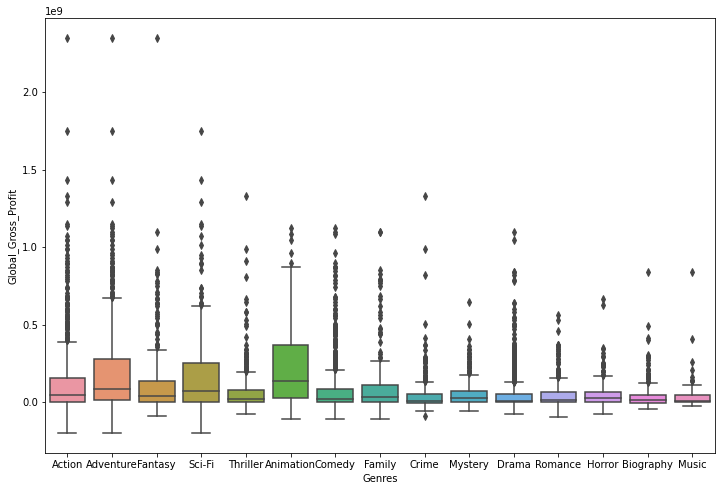

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(x = 'Genres', y='Global_Gross_Profit', data = genres_df)

Text(0.5, 1.0, 'Genres Count')

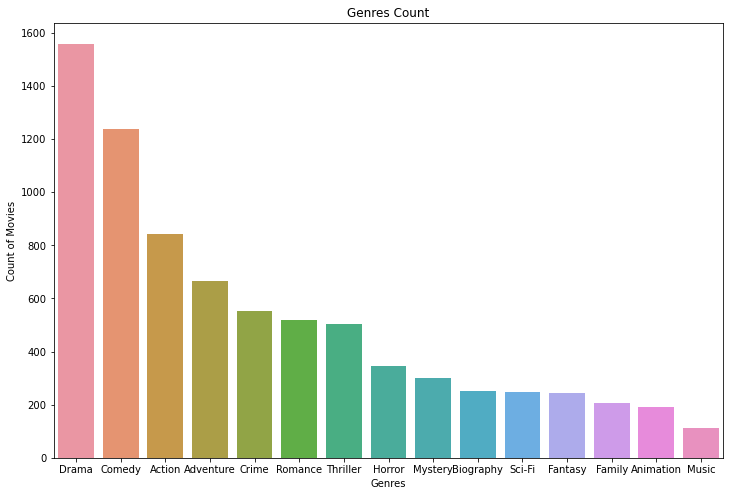

In [10]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x = genres_types.index, y= genres_types.values)
plt.xlabel('Genres')
plt.ylabel('Count of Movies')
plt.title('Genres Count')

In [11]:
meangl = genres_df.groupby('Genres')[['Global_Gross_Profit','Budget','VoteCount','TotalVotesRating']].agg(['sum']).reset_index()
meangl.drop(meangl.tail(1).index, inplace=True)
meangl['roi'] = meangl['Global_Gross_Profit']/meangl['Budget']
meangl['avgrating'] = meangl['TotalVotesRating']/meangl['VoteCount']
meangl

,Genres,Global_Gross_Profit,Budget,VoteCount,TotalVotesRating,roi,avgrating
,,sum,sum,sum,sum,,
0,Action,1.097308e+11,6.206320e+10,169423419.0,1.189234e+09,1.768050,7.019302
1,Adventure,1.333282e+11,6.118434e+10,144826824.0,1.031154e+09,2.179123,7.119911
2,Animation,4.201689e+10,1.624555e+10,30289264.0,2.205749e+08,2.586363,7.282281
3,Biography,1.057619e+10,6.896410e+09,28006661.0,2.118081e+08,1.533578,7.562776
4,Comedy,8.692597e+10,4.461949e+10,120211880.0,8.111240e+08,1.948161,6.747453
5,Crime,2.222853e+10,1.847427e+10,68788177.0,4.894445e+08,1.203215,7.115241
6,Drama,6.525533e+10,4.405422e+10,176781288.0,1.300204e+09,1.481250,7.354874
7,Family,2.358020e+10,1.226631e+10,19550058.0,1.318806e+08,1.922355,6.745793
8,Fantasy,3.390076e+10,1.806798e+10,40852509.0,2.736304e+08,1.876290,6.698007


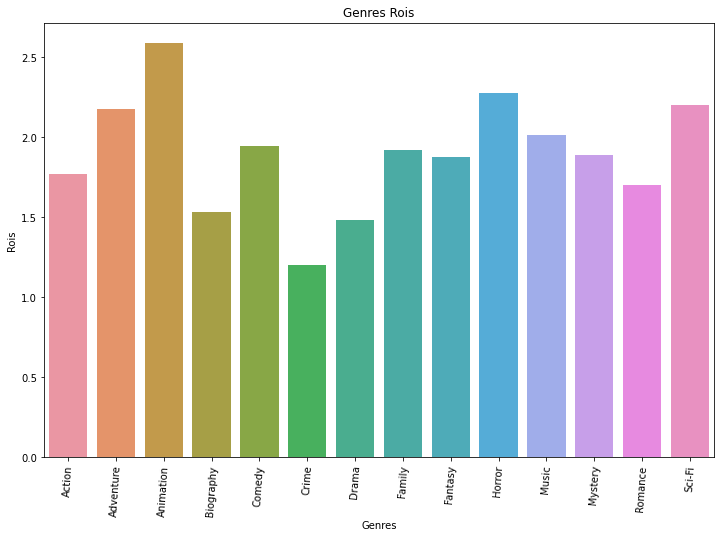

In [12]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x = 'Genres', y='roi', data = meangl)
plt.xlabel('Genres')
plt.ylabel('Rois')
plt.title('Genres Rois')
plt.xticks(rotation=86);

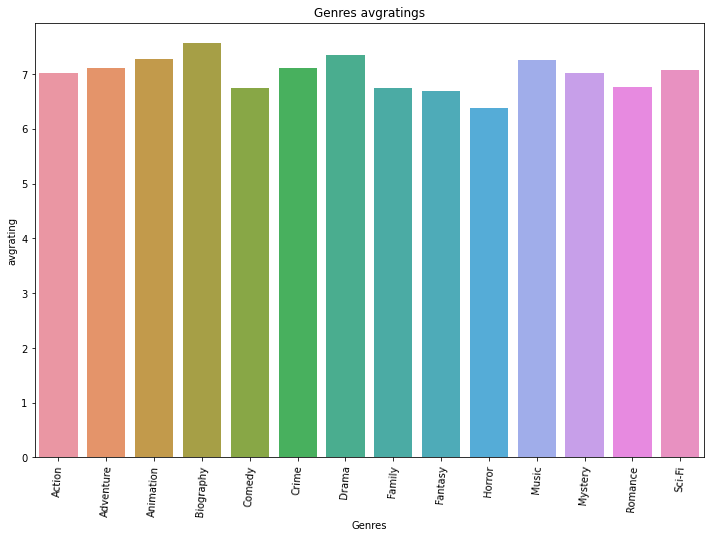

In [13]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(x = 'Genres', y='avgrating', data = meangl)
plt.xlabel('Genres')
plt.ylabel('avgrating')
plt.title('Genres avgratings')
plt.xticks(rotation=86);

In [14]:
actors = df.explode('Actors')
actors_types = actors['Actors'].value_counts()[lambda x : x>15].drop("")
actors_df = actors[actors['Actors'].isin(actors_types.index)]
actors_df.head()

,Title,Budget,Domestic_Gross_Rev,Global_Gross_Rev,Year,Global_Gross_Profit,Global_Gross_ROI,Title & Year,ID,Runtime,Genres,AvgRating,VoteCount,Actors,Writers,Directors,Producers,TotalVotesRating
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,635063875.0,1.546673,Pirates of the Caribbean: On Stranger Tides - ...,tt1298650,137,"[Action, Adventure, Fantasy]",6.6,548477.0,Johnny Depp,"Tim Powers, Ted Elliott, Terry Rossio, Stuart ...",Rob Marshall,NaN,3619948.2
5,Pirates of the Caribbean: At World's End,300000000.0,309420425.0,9.634204e+08,2007,663420425.0,2.211401,Pirates of the Caribbean: At World's End - 2007,tt0449088,169,"[Action, Adventure, Fantasy]",7.1,675150.0,Johnny Depp,"Ted Elliott, Terry Rossio, Stuart Beattie, Jay...",Gore Verbinski,Jerry Bruckheimer,4793565.0
6,Justice League,300000000.0,229024295.0,6.559452e+08,2017,355945209.0,1.186484,Justice League - 2017,tt0974015,120,"[Action, Adventure, Fantasy]",6.1,468750.0,Ben Affleck,"Gardner Fox, Jerry Siegel, Joe Shuster, Chris ...",Zack Snyder,NaN,2859375.0
8,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,2012,809439099.0,2.943415,The Dark Knight Rises - 2012,tt1345836,164.0,"[Action, Thriller]",8.4,1387769.0,Christian Bale,"Jonathan Nolan,David S. Goyer,Bob Kane",Christopher Nolan,"Emma Thomas,Charles Roven",11657259.6
10,The Lone Ranger,275000000.0,89302115.0,2.600021e+08,2013,-14997885.0,-0.054538,The Lone Ranger - 2013,tt1210819,150.0,"[Action, Adventure, Western]",6.4,208827.0,Johnny Depp,"Justin Haythe,Ted Elliott,Terry Rossio",Gore Verbinski,Jerry Bruckheimer,1336492.8


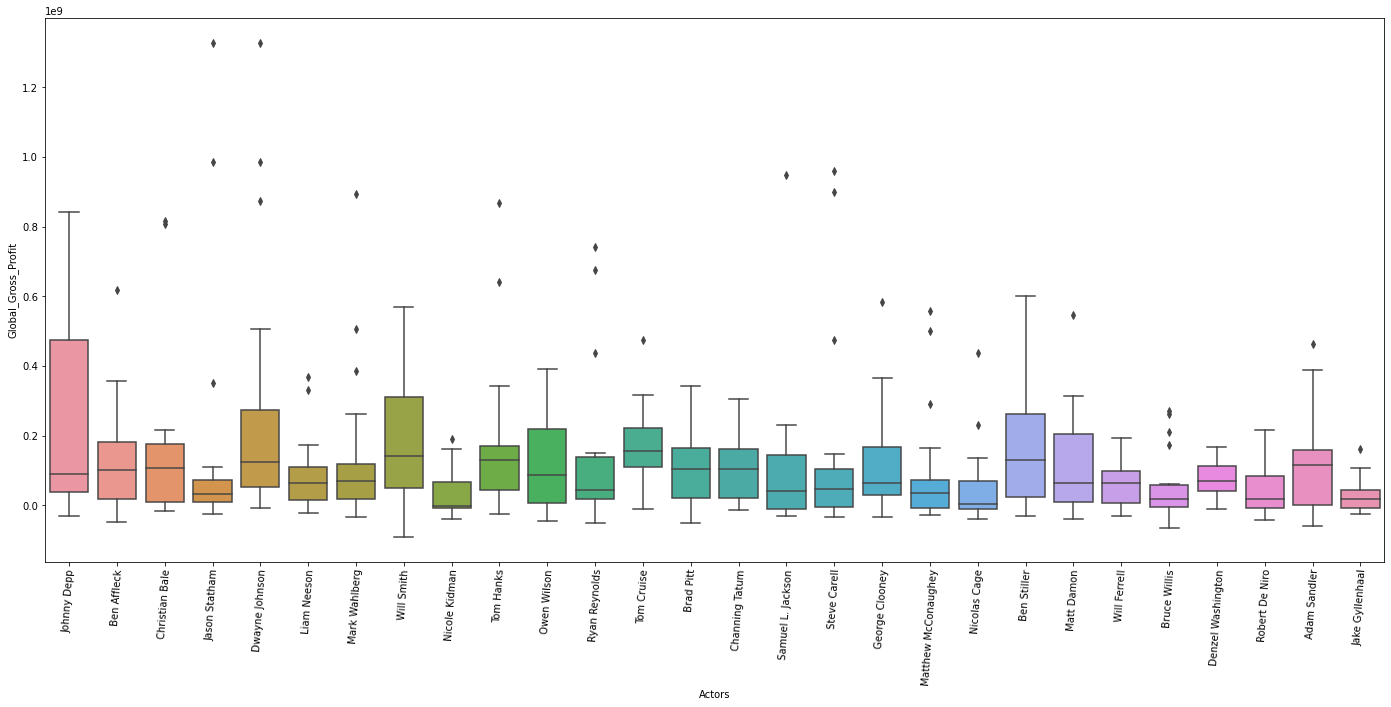

In [15]:
fig, ax = plt.subplots(figsize=(24,10))
sns.boxplot(x = 'Actors', y='Global_Gross_Profit', data = actors_df)
plt.xticks(rotation=86);